In [1]:
import psycopg2
from psycopg2 import sql
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
def connect_to_postgres(host, dbname, user, password, port=5432):

    try:
        connection = psycopg2.connect(
            host=host,
            database=dbname,
            user=user,
            password=password,
            port=port
        )

        cursor = connection.cursor()

        cursor.execute("SELECT version();")
        db_version = cursor.fetchone()

        print(f"Connected to PostgreSQL database. Version: {db_version[0]}")

        return connection, cursor

    except Exception as e:
        print(f"Error connecting to the database: {e}")
        return None, None

In [3]:
def close_connection(connection, cursor):

    if cursor:
        cursor.close()
    if connection:
        connection.close()
        print("PostgreSQL connection closed.")

In [4]:
def download_table_to_csv(connection, table_name, file_name):
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql(query, connection)

    df.to_csv(file_name, index=False)
    print(f"Table '{table_name}' downloaded to '{file_name}' successfully.")

In [5]:
def download_table_to_dataframe(connection, table_name):
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql(query, connection)
    print(f"Table '{table_name}' downloaded into a DataFrame.")
    return df

In [ ]:

host = 'localhost'
dbname = 'postgres'
user = 'postgres'
password = 'w!xK3b<js9#Ud6cEe9BjjpJuJC&8'
port = 5432

connection, cursor = connect_to_postgres(host, dbname, user, password, port)

if connection and cursor:
    users_df = download_table_to_dataframe(connection, 'users')
    votes_df = download_table_to_dataframe(connection, 'votes')

    close_connection(connection, cursor)


Connected to PostgreSQL database. Version: PostgreSQL 16.3 (Debian 16.3-1.pgdg120+1) on x86_64-pc-linux-gnu, compiled by gcc (Debian 12.2.0-14) 12.2.0, 64-bit
Table 'users' downloaded into a DataFrame.
Table 'votes' downloaded into a DataFrame.
PostgreSQL connection closed.


/tmp/ipykernel_2353239/1533858628.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [8]:
users_df.head()

,id,username,password
0,1,admin,scrypt:32768:8:1$ktUqlrDWh50HVjLQ$8d4b754e9ae3...
1,5,leoomaia,scrypt:32768:8:1$H9CiENOpiyftg4Ob$b92dce6fe90a...
2,4,sacramento,scrypt:32768:8:1$dF6ICPxpo9FWN7lr$592409ff79ce...
3,3,pep,scrypt:32768:8:1$wbtZ8bttEvpKFnQL$1eab933d24d4...
4,6,chicoin,scrypt:32768:8:1$lnkIUx8sECp6LmDy$55f447a910fc...


In [9]:
votes_df.head()

,id,user_id,vote,meta_id,vote_date
0,1,7,6,01J19HAN87WR2MNHHX15HSPHZ5,2024-09-06 00:25:36.350796
1,2,7,5,01J19851HG5RZ4V3M4FJDGQRSE,2024-09-06 00:43:28.127458
2,3,7,7,01J1BFKGBH1ZTFCE8811GXKV1E,2024-09-06 00:47:22.360289
3,5,7,8,01J197CN8R8F686X1X4B9STPGE,2024-09-06 00:51:47.085702
4,4,7,9,01J192TK940R0CT8VM23S00AKM,2024-09-06 00:53:45.107260


In [11]:
users_df = users_df.rename(columns={'id': 'user_id'})

merged_df = pd.merge(votes_df, users_df[['user_id', 'username']], on='user_id', how='left')

merged_df

,id,user_id,vote,meta_id,vote_date,username
0,1,7,6,01J19HAN87WR2MNHHX15HSPHZ5,2024-09-06 00:25:36.350796,thelegendofgab
1,2,7,5,01J19851HG5RZ4V3M4FJDGQRSE,2024-09-06 00:43:28.127458,thelegendofgab
2,3,7,7,01J1BFKGBH1ZTFCE8811GXKV1E,2024-09-06 00:47:22.360289,thelegendofgab
3,5,7,8,01J197CN8R8F686X1X4B9STPGE,2024-09-06 00:51:47.085702,thelegendofgab
4,4,7,9,01J192TK940R0CT8VM23S00AKM,2024-09-06 00:53:45.107260,thelegendofgab
...,...,...,...,...,...,...
1344,1470,5,8,01J1AGHW2Q3DGEMG9Q610Z8HK2,2024-11-16 14:06:51.717011,leoomaia
1345,1474,5,1,01J1AJQXHBTNHWHANA9VY7AV3B,2024-11-16 14:08:21.928099,leoomaia
1346,1477,5,0,01J19BWEVFX9PA6078T6B0NKP6,2024-11-16 14:09:47.116794,leoomaia
1347,1484,5,3,01J1A79Q0SNC3WKJR1XXTPVA3W,2024-11-16 14:13:30.427898,leoomaia


In [12]:
merged_df['vote_date'] = merged_df['vote_date'].astype(str).str[:10]

merged_df

,id,user_id,vote,meta_id,vote_date,username
0,1,7,6,01J19HAN87WR2MNHHX15HSPHZ5,2024-09-06,thelegendofgab
1,2,7,5,01J19851HG5RZ4V3M4FJDGQRSE,2024-09-06,thelegendofgab
2,3,7,7,01J1BFKGBH1ZTFCE8811GXKV1E,2024-09-06,thelegendofgab
3,5,7,8,01J197CN8R8F686X1X4B9STPGE,2024-09-06,thelegendofgab
4,4,7,9,01J192TK940R0CT8VM23S00AKM,2024-09-06,thelegendofgab
...,...,...,...,...,...,...
1344,1470,5,8,01J1AGHW2Q3DGEMG9Q610Z8HK2,2024-11-16,leoomaia
1345,1474,5,1,01J1AJQXHBTNHWHANA9VY7AV3B,2024-11-16,leoomaia
1346,1477,5,0,01J19BWEVFX9PA6078T6B0NKP6,2024-11-16,leoomaia
1347,1484,5,3,01J1A79Q0SNC3WKJR1XXTPVA3W,2024-11-16,leoomaia


In [ ]:
desired_columns = [
    'id', 'user_id', 'vote', 'meta_id', 'vote_date', 'username', 'timestamp', 'ip_str',
    'org', 'org_clean', 'isp', 'data', 'port', 'hostnames', 'domains', 'city',
    'region_code', 'latitude', 'longitude', 'os', 'device', 'devicetype', 'cpe23',
    'http', 'vulns', 'vulns_scores'
]

for column in desired_columns:
    if column not in merged_df.columns:
        merged_df[column] = None

merged_df

,id,user_id,vote,meta_id,vote_date,username,timestamp,ip_str,org,org_clean,...,region_code,latitude,longitude,os,device,devicetype,cpe23,http,vulns,vulns_scores
0,1,7,6,01J19HAN87WR2MNHHX15HSPHZ5,2024-09-06,thelegendofgab,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2,7,5,01J19851HG5RZ4V3M4FJDGQRSE,2024-09-06,thelegendofgab,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,3,7,7,01J1BFKGBH1ZTFCE8811GXKV1E,2024-09-06,thelegendofgab,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,5,7,8,01J197CN8R8F686X1X4B9STPGE,2024-09-06,thelegendofgab,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,4,7,9,01J192TK940R0CT8VM23S00AKM,2024-09-06,thelegendofgab,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,1470,5,8,01J1AGHW2Q3DGEMG9Q610Z8HK2,2024-11-16,leoomaia,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1345,1474,5,1,01J1AJQXHBTNHWHANA9VY7AV3B,2024-11-16,leoomaia,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1346,1477,5,0,01J19BWEVFX9PA6078T6B0NKP6,2024-11-16,leoomaia,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1347,1484,5,3,01J1A79Q0SNC3WKJR1XXTPVA3W,2024-11-16,leoomaia,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


<Figure size 1000x600 with 0 Axes>

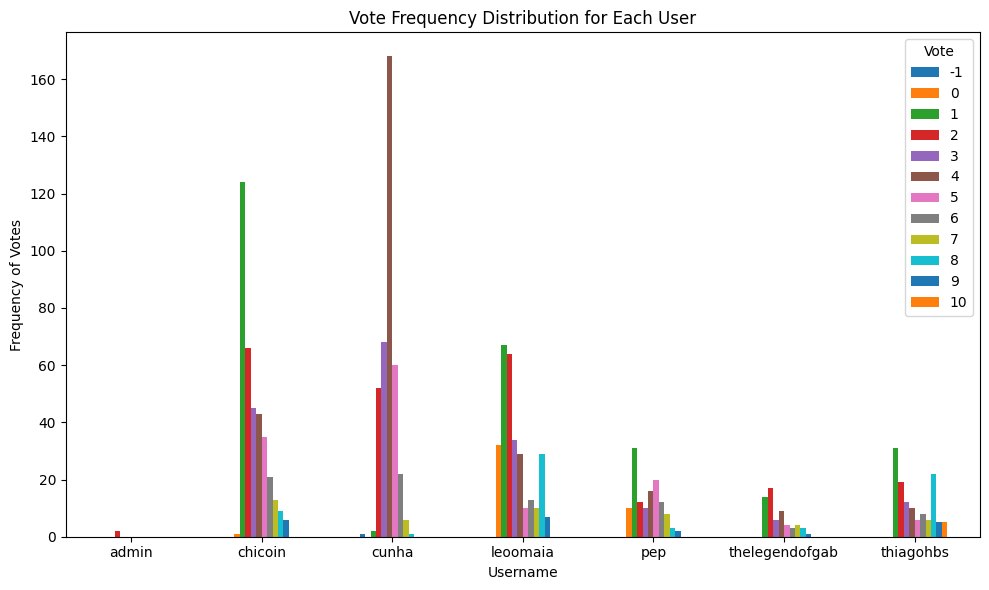

In [14]:
df = merged_df

plt.figure(figsize=(10, 6))

vote_counts = df.groupby(['username', 'vote']).size().unstack(fill_value=0)

vote_counts.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.title("Vote Frequency Distribution for Each User")
plt.xlabel("Username")
plt.ylabel("Frequency of Votes")
plt.xticks(rotation=0)
plt.legend(title="Vote", loc='upper right')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

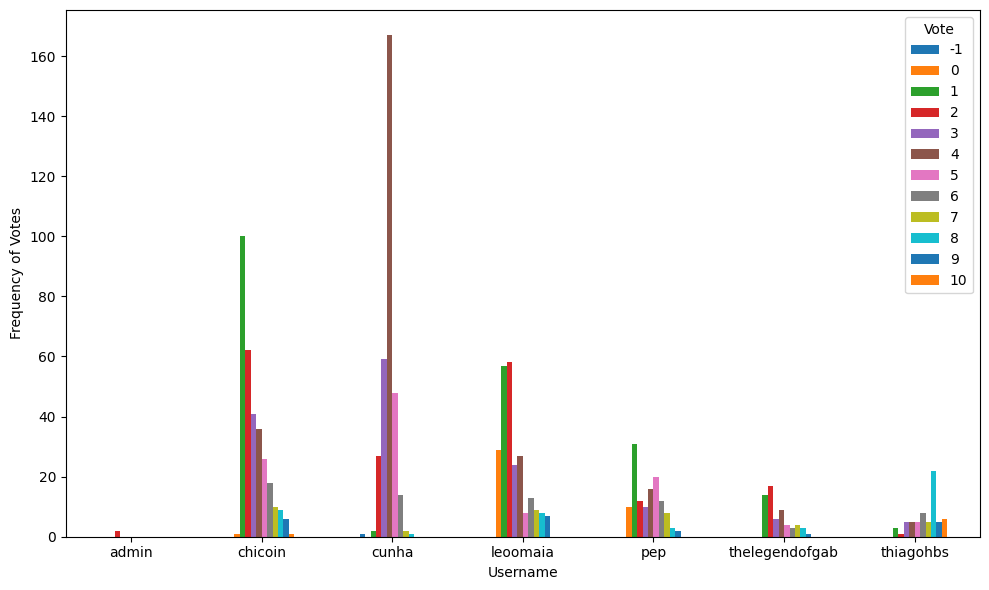

In [ ]:
filtered_df = merged_df[merged_df['vote_date'] > '2024-10-21']

plt.figure(figsize=(10, 6))

vote_counts_filtered = merged_df.groupby(['username', 'vote']).size().unstack(fill_value=0)

vote_counts_filtered.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.xlabel("Username")
plt.ylabel("Frequency of Votes")
plt.xticks(rotation=0)
plt.legend(title="Vote", loc='upper right')

plt.tight_layout()
plt.show()

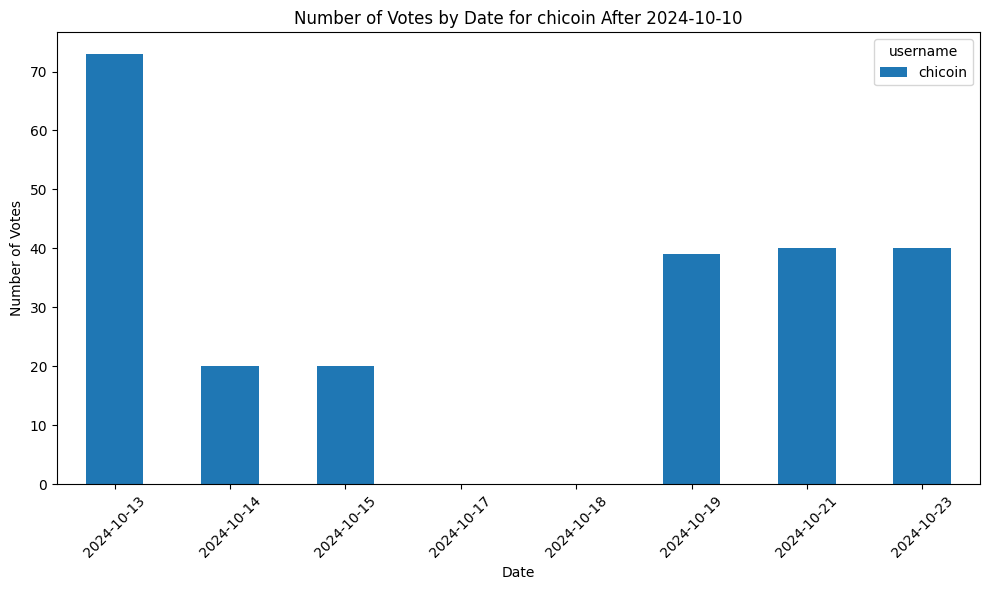

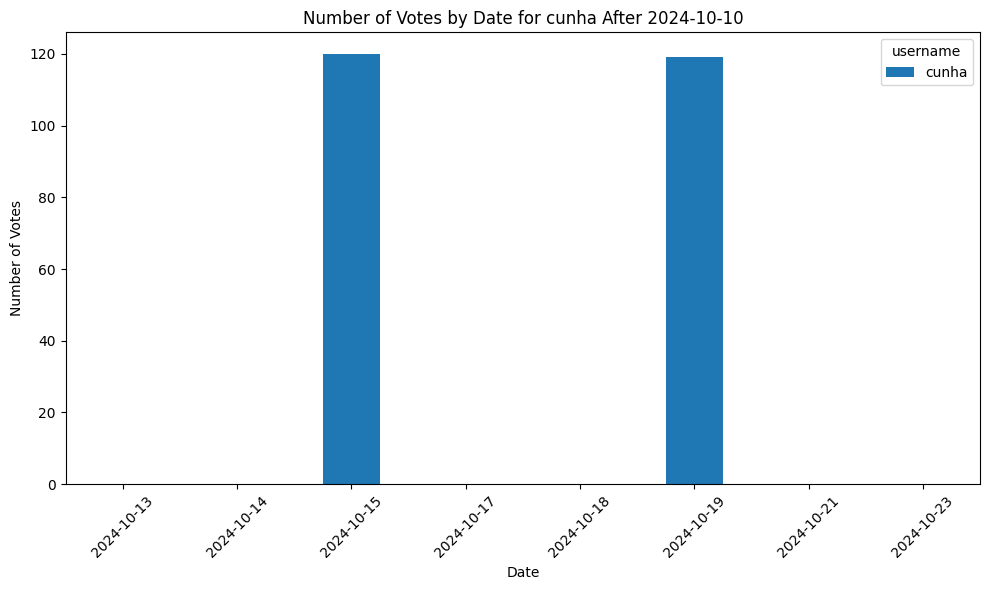

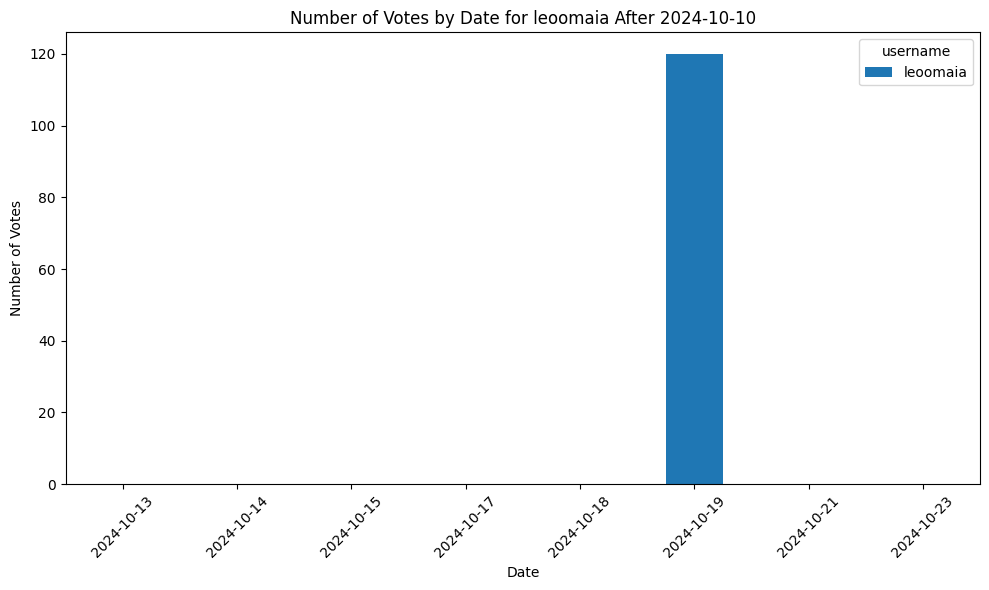

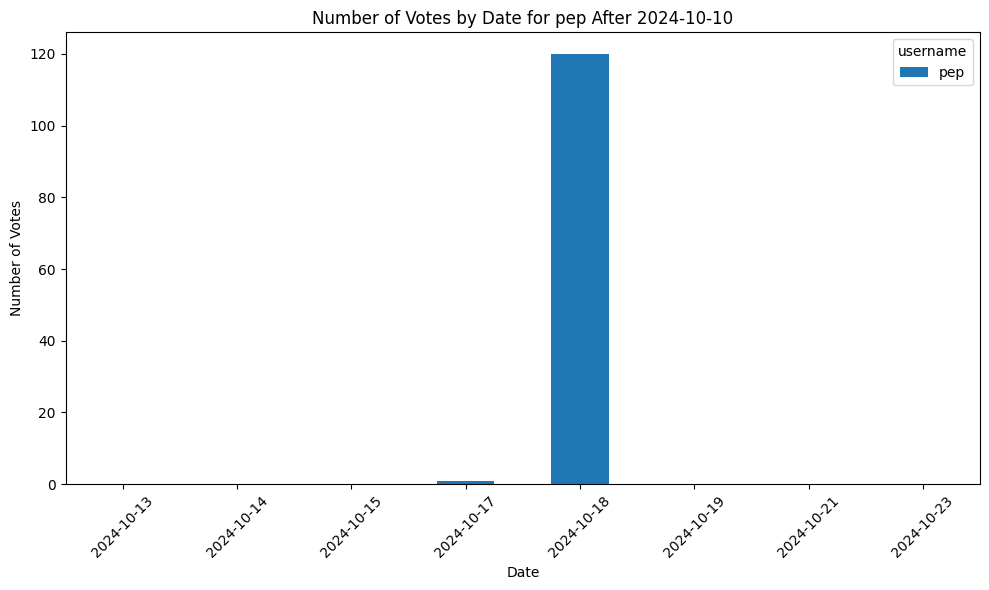

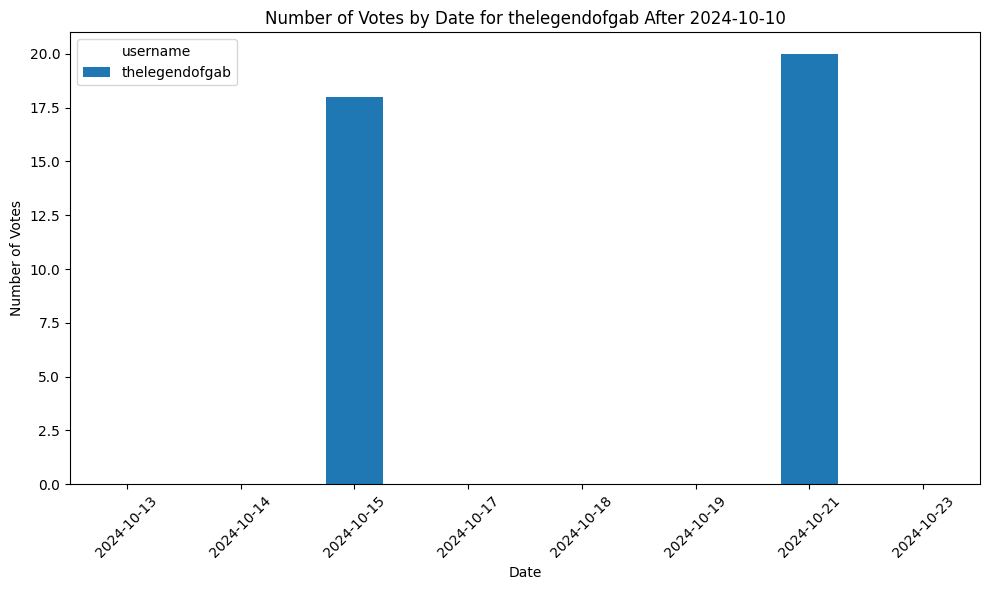

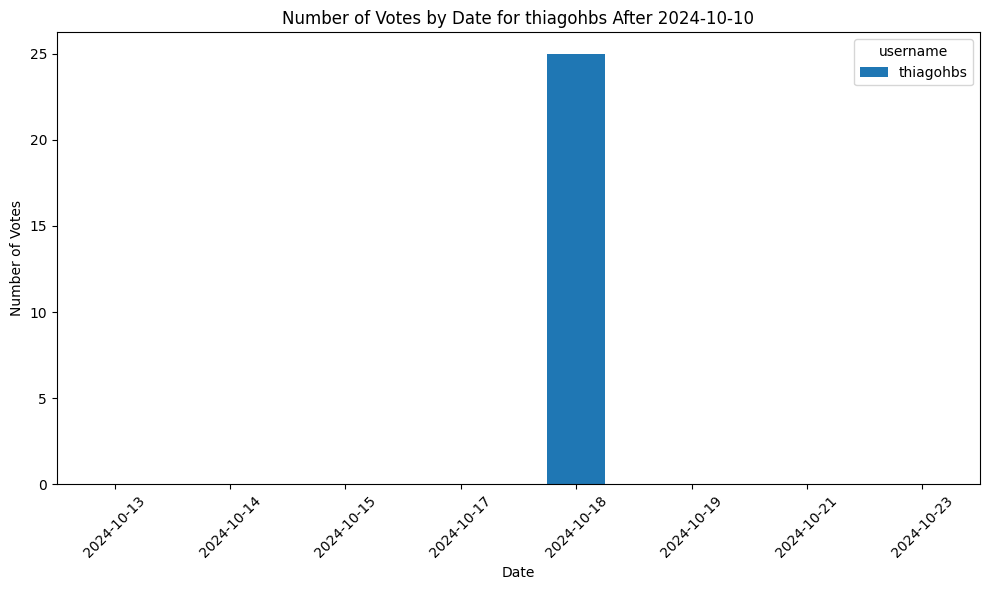

In [14]:
filtered_df = merged_df[merged_df['vote_date'] > '2024-10-10']

filtered_vote_counts = filtered_df.groupby(['vote_date', 'username']).size().unstack(fill_value=0)

for user in filtered_vote_counts.columns:
    filtered_vote_counts[[user]].plot(kind='bar', figsize=(10, 6))

    plt.title(f'Number of Votes by Date for {user} After 2024-10-10')
    plt.xlabel('Date')
    plt.ylabel('Number of Votes')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

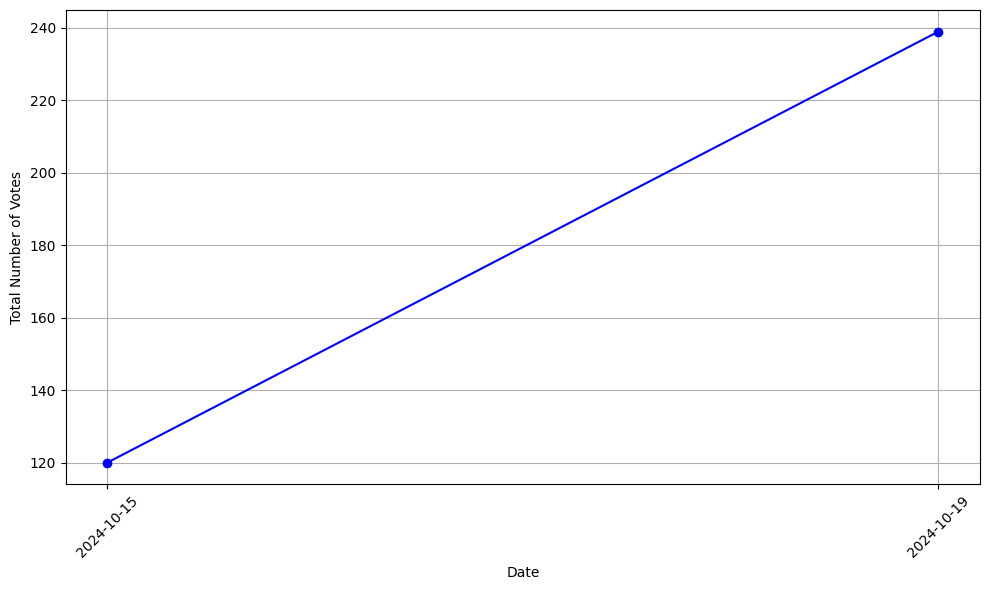

In [15]:
filtered_df_chicoin = merged_df[(merged_df['vote_date'] > '2024-10-10') & (merged_df['username'] == 'cunha')]

vote_counts_chicoin = filtered_df_chicoin.groupby('vote_date').size().cumsum()

plt.figure(figsize=(10, 6))
plt.plot(vote_counts_chicoin, marker='o', linestyle='-', color='b')

plt.xlabel('Date')
plt.ylabel('Total Number of Votes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
from deltalake import DeltaTable
from croniter import croniter
from datetime import datetime, timedelta
import pyarrow.dataset as ds
import pandas as pd
import numpy as np
import glob
import os
import re

RESULT_FOLDER = os.environ.get("RESULT_FOLDER", "./output_data")
CRON_EXPRESSION = os.environ.get("CRON_EXPRESSION", "*/1 * * * *")
SHODAN_FOLDER = os.environ.get("SHODAN_FOLDER", "./input_data")
RESULT_FOLDER = os.environ.get("RESULT_FOLDER", "./output_data")
RETENTION_VACUUM_HOURS = 24*7
class DatasetManager(object):

    def __init__(self):
        self.available_datasets = {}
        self.tlhop_epss_report_path = RESULT_FOLDER + "/tlhop-epss-dashboard.delta"
        self.tlhop_epss_views_path = RESULT_FOLDER + "/tlhop-epss-dashboard-view{}.delta"
        self.n_views = 3
        self.sampled_data = None

    def check_available_datasets(self):
        available_datasets = {}
        last_vacuum_timestamp = None

        if os.path.exists(self.tlhop_epss_report_path):
            dt = DeltaTable(self.tlhop_epss_report_path)
            for commit in dt.history():
                if commit.get("operation", "") == "WRITE":
                    timestamp_commit = datetime.fromtimestamp(commit['timestamp'] / 1e3)

                    if 'userMetadata' in commit:
                        day = re.findall("\d+", os.path.basename(commit['userMetadata']))[0]
                        date_commit = day[0:4]+"-"+day[4:6]+"-"+day[6:8]
                    else:
                        date_commit = timestamp_commit.strftime("%Y-%m-%d")

                    if not last_vacuum_timestamp:
                        available_datasets[date_commit] = commit['version']
                    elif timestamp_commit > last_vacuum_timestamp:
                        available_datasets[date_commit] = commit['version']
                    else:
                        # print(f"[date_commit] {timestamp_commit} (dump: {date_commit}) is already removed.")
                        pass

                elif (commit.get("operation", "") == "VACUUM END") and (not last_vacuum_timestamp):
                    last_vacuum_timestamp = datetime.fromtimestamp(commit['timestamp'] / 1e3) - timedelta(hours=RETENTION_VACUUM_HOURS)
        else:
            print(f"[ERROR][DatasetManager] File '{self.tlhop_epss_report_path}' not found")

        self.available_datasets = available_datasets
        print(f"[INFO][DatasetManager] Commits found: {self.available_datasets}")

    def last_commit(self):
        """
        Return the timestamp where the last dump was processed.
        This information is not directly related to the timestamp dump itself.
        """

        if os.path.exists(self.tlhop_epss_report_path):
            dt = DeltaTable(self.tlhop_epss_report_path)
            for commit in dt.history():
                if commit.get("operation", "") == "WRITE":
                    last_timestamp = datetime.fromtimestamp(commit['timestamp'] / 1e3)
                    return last_timestamp
        return None

    def get_date_dumps(self):
        """
        """
        dates = sorted(list(self.available_datasets.keys()), reverse=True)
        return dates

    def last_dump_date(self):
        """
        Returns the timestamp of the newest dump
        """
        dates = sorted(list(self.available_datasets.keys()), reverse=True)
        if len(dates) > 0:
            return dates[0]
        return "1991-06-15"

    def retrive_commit(self, day):
        return self.available_datasets.get(day, -1)

    def get_view_dataset(self, day, code):

        commit = self.retrive_commit(day)
        if commit >= 0:
            filepath = self.tlhop_epss_views_path.format(code)

            print(f"[INFO][DatasetManager] Reading {code} of day {day}")
            dt = DeltaTable(filepath, version=commit)
            df = dt.to_pandas()
        else:
            df = pd.DataFrame()
        return df

    def get_report_dataset(self, day, columns=None, condition=None, single_output=False):

        commit = self.retrive_commit(day)
        if commit >= 0:
            filepath = self.tlhop_epss_report_path

            print(f"[INFO][DatasetManager] Reading report of day {day}")
            dt = DeltaTable(filepath, version=commit).to_pyarrow_dataset()

            if single_output:
                df = dt.filter(condition).head(1).to_pydict()
            else:
                df = dt.to_table(filter=condition, columns=columns).to_pandas()
        else:
            df = pd.DataFrame()
        return df

    def get_report_dataset_new(self, day, columns=None, condition=None, single_output=False, start=0, finish=-1, sort_by='score', ascending=False):
        commit = self.retrive_commit(day)
        df = None
        if commit >= 0:
            filepath = self.tlhop_epss_report_path

            print(f"Reading report of day {day}")
            dt = DeltaTable(filepath, version=commit).to_pyarrow_dataset()

            if single_output:
                df = dt.filter(condition).head(1).to_pydict()
            else:
                table = dt.to_table(filter=condition, columns=None)
                df = table.to_pandas()
                #df['score'] = df['vulns_scores'].apply(lambda x: x.get('epss', []) if isinstance(x, dict) else [])
                #df['score'] = df['score'].apply(lambda probs: 1 - np.prod([1 - p for p in probs]))
                df['score'] = df['vulns_scores'].apply(lambda x: max(x.get('epss', [0])) if isinstance(x, dict) else 0)
                df = df.drop(columns=['vulns_scores'])
                #df = df.sort_values(by=sort_by, ascending=ascending)

                # Sample 600 random entries
                df = df.sample(n=600, random_state=42)

                if finish > 0:
                    df = df.iloc[start:finish]

            file_path = 'file_ips.csv'
            df.to_csv(file_path, index=False)
            print(f"DataFrame saved to {file_path} successfully.")

        return df

    def sample_data(self, day, random_state, entries):
        """
        Sample N random entries from the dataset and store them
        """
        commit = self.retrive_commit(day)

        if commit >= 0:
            filepath = self.tlhop_epss_report_path

            print(f"[### SAMPLE_DATA ###] Sampling data for each user: {day} - Random state: {random_state}")
            dt = DeltaTable(filepath, version=commit).to_pyarrow_dataset()

            table = dt.to_table(columns=None)
            df = table.to_pandas()

            df['score'] = df['vulns_scores'].apply(lambda x: max(x.get('epss', [0])) if isinstance(x, dict) else 0)
            df = df.drop(columns=['vulns_scores'])
            #df = df.sort_values(by=sort_by, ascending=ascending)

            #self.sampled_data = df.sample(n=600, random_state=42)
            self.sampled_data = df.sample(n=entries, random_state=random_state)

        else:
            self.sampled_data = pd.DataFrame()

    def get_report_each(self, day, user_id=None, columns=None, condition=None, single_output=False, start=0, finish=-1, sort_by='score', ascending=False):
        """
        Fetch 120 entries for each user from pre-sampled data.
        If the data is not yet sampled for the current day, it will sample it first.
        """
        if self.sampled_data is None:
            self.sample_data(day, 777, 600)

        if self.sampled_data is not None:
            print(f"Using pre-sampled data for day {day} for user {user_id}")
            df = self.sampled_data.copy()

            if single_output:
                df_filtered = df.query(condition) if condition else df
                df = df_filtered.head(1).to_dict(orient='records')
            else:
                if condition:
                    df = df.query(condition)

                #df = df.sort_values(by=sort_by, ascending=ascending)

                num_users = 6
                entries_per_user = 120

                user_index = user_id % num_users
                start_index = user_index * entries_per_user
                end_index = start_index + entries_per_user

                df = df.iloc[start_index:end_index]

                if finish > 0:
                    df = df.iloc[start:finish]
        else:
            df = pd.DataFrame()

        return df

    def get_total_entries_new(self, day, condition=None):
        commit = self.retrive_commit(day)
        total_entries = 0
        if commit >= 0:
            filepath = self.tlhop_epss_report_path
            dt = DeltaTable(filepath, version=commit).to_pyarrow_dataset()
            if condition:
                total_entries = dt.filter(condition).count_rows()
            else:
                total_entries = dt.count_rows()
        return total_entries

    def remove_old_data(self):
        # default of 1 week
        filepaths = [self.tlhop_epss_report_path] + \
            [self.tlhop_epss_views_path.format(code+1) for code in range(self.n_views)]

        for filepath in filepaths:
            filepath = filepath.replace("//", "/")
            print(f"[INFO][DatasetManager][remove_old_data] - checking file {filepath}", flush=True)
            try:
                dt = DeltaTable(filepath)
                dt.vacuum(retention_hours=RETENTION_VACUUM_HOURS, dry_run=False,  enforce_retention_duration=False)
            except:
                print(f"[ERROR][DatasetManager][remove_old_data] - error to vacuum file '{filepath}'",flush=True)

    def waiting_next_file(self, mode="latest"):
        next_date = self.last_dump_date().replace("-", "")

        filepath =  SHODAN_FOLDER + "/BR.{pattern}.json.bz2"
        available_dates = [os.path.basename(s)[3:-9] for s in sorted(glob.glob(filepath.format(pattern="*")))]

        found_files = [day[0:4]+"-"+day[4:6]+"-"+day[6:8] for day in available_dates if next_date < day]
        if len(found_files) > 0:
            if mode == "all":
                print("[INFO][waiting_next_file] Found a new Shodan dump for day: ", found_files, flush=True)
                return found_files
            elif mode == "latest":
                print("[INFO][waiting_next_file] Found a new Shodan dump for day: ", found_files[-1], flush=True)
                return [found_files[-1]]

        return None

    def compute_next_dump(self, last_date_commit):
        if last_date_commit:
            scheduler = croniter(CRON_EXPRESSION, last_date_commit)
            next_run = scheduler.get_next(datetime)
        else:
            next_run = datetime.now()
        return next_run

    def search_by_meta_id(self, day, meta_id):
        """
        Search for a specific meta_id in the dataset and return the corresponding information.
        """
        commit = self.retrive_commit(day)
        if commit >= 0:
            filepath = self.tlhop_epss_report_path

            dt = DeltaTable(filepath, version=commit).to_pyarrow_dataset()

            condition = ds.field('meta_id') == meta_id

            result = dt.to_table(filter=condition).to_pandas()

            if not result.empty:
                a = "a"
            else:
                print(f"[INFO] No data found for meta_id {meta_id}.")

            return result
        else:
            print(f"[ERROR] No dataset available for day {day}")
            return pd.DataFrame()

    def update_merged_df_with_search_results(self, merged_df, day):
        for index, row in merged_df.iterrows():
            meta_id = row['meta_id']

            search_result = self.search_by_meta_id(day, meta_id)

            if not search_result.empty:
                for col in search_result.columns:
                    if col in merged_df.columns:
                        merged_df.at[index, col] = search_result[col].values[0]
                    else:
                        merged_df[col] = None
                        merged_df.at[index, col] = search_result[col].values[0]
            else:
                print(f"[INFO] No result found for meta_id {meta_id}. Skipping row {index}.")

        return merged_df

manager = DatasetManager()

manager.check_available_datasets()


[INFO][DatasetManager] Commits found: {'2024-06-26': 1, '2024-05-02': 0}


In [17]:
day = '2024-06-26'
final_df = manager.update_merged_df_with_search_results(merged_df, day)

final_df

[INFO] No data found for meta_id 01J82N5P5WZ76GG02VAD33QFRY.
[INFO] No result found for meta_id 01J82N5P5WZ76GG02VAD33QFRY. Skipping row 600.


,id,user_id,vote,meta_id,vote_date,username,timestamp,ip_str,org,org_clean,...,region_code,latitude,longitude,os,device,devicetype,cpe23,http,vulns,vulns_scores
0,1,7,6,01J19HAN87WR2MNHHX15HSPHZ5,2024-09-06,thelegendofgab,2024-06-26T05:47:05.351616,52.67.146.242,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,SP,-23.5475,-46.63611,None,None,None,"[cpe:2.3:a:eclipse:jetty:9.4.21, cpe:2.3:a:get...","{""status"":""200"",""title"":""Mirth Connect Adminis...","[{'cve_id': 'CVE-2023-36478', 'cvss_score': 7....","{'cve_id': ['CVE-2023-36478', 'CVE-2020-11022'..."
1,2,7,5,01J19851HG5RZ4V3M4FJDGQRSE,2024-09-06,thelegendofgab,2024-06-26T03:06:44.144869,191.194.128.150,TELEFÔNICA BRASIL S.A,TELEFONICA BRASIL,...,PE,-8.05389,-34.88111,None,None,None,cpe:2.3:a:f5:nginx:1.12.2,"{""status"":""200"",""host"":""191.194.128.150"",""serv...","[{'cve_id': 'CVE-2019-9516', 'cvss_score': 6.5...","{'cve_id': ['CVE-2019-9516', 'CVE-2019-9511', ..."
2,3,7,7,01J1BFKGBH1ZTFCE8811GXKV1E,2024-09-06,thelegendofgab,2024-06-26T23:55:26.961499,131.221.236.27,OuriNet TELECOM,OURINET TELECOM,...,PE,-7.8825,-40.08167,None,None,None,"[cpe:2.3:a:apache:http_server, cpe:2.3:a:php:p...","{""status"":""404"",""title"":""Page Not Found"",""host...","[{'cve_id': 'CVE-2020-7060', 'cvss_score': 9.1...","{'cve_id': ['CVE-2020-7060', 'CVE-2020-11579',..."
3,5,7,8,01J197CN8R8F686X1X4B9STPGE,2024-09-06,thelegendofgab,2024-06-26T02:53:25.144024,15.228.189.192,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,SP,-23.5475,-46.63611,None,None,None,cpe:2.3:a:php:php:5.4.45,"{""status"":""200"",""title"":""NSA320S"",""host"":""15.2...","[{'cve_id': 'CVE-2016-7414', 'cvss_score': 9.8...","{'cve_id': ['CVE-2016-7414', 'CVE-2016-5399', ..."
4,4,7,9,01J192TK940R0CT8VM23S00AKM,2024-09-06,thelegendofgab,2024-06-26T01:33:38.980115,52.67.20.116,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,SP,-23.5475,-46.63611,None,None,None,"[cpe:2.3:a:apache:http_server, cpe:2.3:a:dokuw...","{""status"":""200"",""title"":""Últimas Modificações:...","[{'cve_id': 'CVE-2019-9021', 'cvss_score': 9.8...","{'cve_id': ['CVE-2019-9021', 'CVE-2018-5711', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,1255,6,4,01J19HQBVGDG9BSATBYCDT4257,2024-10-23,chicoin,2024-06-26T05:54:01.712319,54.233.220.241,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,SP,-23.5475,-46.63611,None,None,None,"[cpe:2.3:a:apache:http_server:2.4.29, cpe:2.3:...","{""status"":""200"",""title"":""MeuEducador - Gestão ...","[{'cve_id': 'CVE-2021-44224', 'cvss_score': 8....","{'cve_id': ['CVE-2021-44224', 'CVE-2019-0211',..."
1119,1256,6,3,01J18ZKEA1GQ9RTG24S7ZJR6XT,2024-10-23,chicoin,2024-06-26T00:37:18.785808,45.137.28.138,GLS Consultoria,GLS CONSULTORIA,...,SP,-23.5475,-46.63611,None,None,None,cpe:2.3:a:apache:http_server:2.4.38,"{""status"":""200"",""title"":""ESATEL DIGITAL"",""host...","[{'cve_id': 'CVE-2022-22721', 'cvss_score': 9....","{'cve_id': ['CVE-2022-22721', 'CVE-2021-32786'..."
1120,1257,6,4,01J1991RWDDA71S7K52K1AWEG1,2024-10-23,chicoin,2024-06-26T03:22:25.549967,45.231.205.180,MINISTERIO DO MEIO AMBIENTE,MINISTERIO DO MEIO AMBIENTE,...,DF,-15.77972,-47.92972,None,None,None,"[cpe:2.3:a:apache:http_server:2.4.37, cpe:2.3:...","{""status"":""200"",""title"":""MantisBT"",""host"":""45....","[{'cve_id': 'CVE-2022-22721', 'cvss_score': 9....","{'cve_id': ['CVE-2022-22721', 'CVE-2018-17199'..."
1121,1258,6,2,01J1AQBE8SPV54K3R0X8G2F7EN,2024-10-23,chicoin,2024-06-26T16:51:36.857735,186.235.160.14,SATURNO COMUNICAÇÕES LTDA,SATURNO COMUNICACOES,...,BA,-17.535,-39.74194,None,None,None,cpe:2.3:a:apache:http_server:2.4.18,"{""status"":""302"",""host"":""186.235.160.14"",""serve...","[{'cve_id': 'CVE-2017-9788', 'cvss_score': 9.1...","{'cve_id': ['CVE-2017-9788', 'CVE-2019-0211', ..."


In [5]:
final_df.to_csv('votes.csv', index=False)

NameError: name 'final_df' is not defined

In [ ]:
import numpy as np
import json
import random
from faker import Faker
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


def extract_features(row):
    org_types = ["cloud computing", "internet service provider", "store", "security",
                 "research", "healthcare", "bank", "education", "military", "government"]

    org_type_features = {org_type: row.get(org_type, 0) for org_type in org_types}

    features = {

        "user_id": row["user_id"],

        "ip_str": row["ip_str"],

        "port": row["port"],
        "hostnames": len(row["hostnames"].split(",")) if pd.notna(row["hostnames"]) else 0,
        "domains": len(row["domains"].split(",")) if pd.notna(row["domains"]) else 0,

        "device": row["device"],
        "devicetype": row["devicetype"],
        "score": row["score"],
        "NumVulnerabilities": len(row["vulns"].split(",")) if pd.notna(row["vulns"]) else 0,
        "NumCritical": sum(1 for vuln in row["vulns"].split(",") if "Critical" in vuln) if pd.notna(row["vulns"]) else 0,
        "NumHigh": sum(1 for vuln in row["vulns"].split(",") if "High" in vuln) if pd.notna(row["vulns"]) else 0,
        "user_name": row["user_name"],

        "Vote": int(row["vote"]),
    }

    features.update(org_type_features)

    return features

features = df.apply(extract_features, axis=1)

features_df = pd.DataFrame(features.tolist())

features_df.head()

#for col in ['org_x', 'isp', 'city', 'region_code', 'os', 'user_name', 'uuid', 'org_y', 'org_name']:
#    features_df[col] = features_df[col].astype('category')


splits = [0.5, 0.7, 0.8, 0.9, 0.95]

average_rmse_dict = {split: [] for split in splits}

unique_users = features_df['user_name'].unique()

for split in splits:
    for user in unique_users:
        user_accuracies = []

        user_data = features_df[features_df['user_name'] == user]

        if len(user_data) < 2:
            print(f"Skipping user: {user} due to insufficient data.")
            continue


        for iteration in range(10):
            seed = iteration + 33

            train_size = int(0.8 * len(user_data))
            X = user_data.drop(columns=["ip_str", "score", "user_name", "Vote"])  # Features
            y = user_data["Vote"]  # Target

            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=(1 - split), random_state=seed, shuffle=True
            )

            model = XGBRegressor(n_estimators=1000,
                                 learning_rate=0.1, max_depth=15, verbosity=0, enable_categorical=True, random_state=seed)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            user_accuracies.append(rmse)

        average_rmse_dict[split].append(np.mean(user_accuracies))


plt.figure(figsize=(10, 6))

user_names = []

x_positions = np.linspace(1, len(splits), len(splits))

user_rmse_dict = {user: [] for user in features_df['user_name'].unique() if user != "thelegendofgab"}  # Exclude "thelegendofgab"
user_vote_counts = features_df['user_name'].value_counts().to_dict()

user_error_dict = {user: [] for user in user_rmse_dict.keys()}
user_std_dev_dict = {user: [] for user in user_rmse_dict.keys()}

for split_index, (split, avg_rmse_list) in enumerate(average_rmse_dict.items()):
    for i, rmse in enumerate(avg_rmse_list):
        user_name = features_df['user_name'].unique()[i]
        if user_name == "thelegendofgab":
            continue  # Skip this user

        plt.plot(x_positions[split_index], rmse, marker='o', linestyle='', label="" if split_index == 0 else "")

        user_rmse_dict[user_name].append(rmse)

        error = rmse
        user_error_dict[user_name].append(error)

for user, rmse_values in user_rmse_dict.items():
    n_votes = user_vote_counts.get(user, 0)  # Get the vote count

    avg_rmse = np.mean(rmse_values)
    std_dev = np.std(rmse_values)

    plt.plot(x_positions, rmse_values, linestyle='-', marker='o', label=f"{user}")

    plt.fill_between(x_positions, np.array(rmse_values) - std_dev, np.array(rmse_values) + std_dev, alpha=0.2)  # Shaded area for standard deviation

for user, rmse_values in user_rmse_dict.items():
    if rmse_values:
        plt.annotate(user, (x_positions[0], rmse_values[0]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=16)

plt.xticks(x_positions, ['50/50', '70/30', '80/20', '90/10', '95/5'], fontsize=20)
plt.xlabel('% de Base Utilizada para Treino', fontsize=20)
plt.ylabel('RMSE Médio', fontsize=20)
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()

plt.tick_params(axis='both', which='major', labelsize=20)

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [1]:
final_df.columns

NameError: name 'final_df' is not defined

In [27]:
merged_df

,id,user_id,vote,meta_id,vote_date,username,timestamp_x,ip_str_x,org_x,org_clean_x,...,region_code,latitude,longitude,os,device,devicetype,cpe23,http,vulns,vulns_scores
0,1,7,6,01J19HAN87WR2MNHHX15HSPHZ5,2024-09-06,thelegendofgab,2024-06-26 05:47:05.351616+00:00,52.67.146.242,Amazon Data Services Brazil,AMAZON DATA SERVICES BRAZIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,7,5,01J19851HG5RZ4V3M4FJDGQRSE,2024-09-06,thelegendofgab,NaT,NaN,NaN,NaN,...,PE,-8.05389,-34.88111,None,None,None,[cpe:2.3:a:f5:nginx:1.12.2],"{""status"":""200"",""host"":""191.194.128.150"",""serv...","[{'cve_id': 'CVE-2019-9516', 'cvss_score': 6.5...","{'cve_id': ['CVE-2019-9516', 'CVE-2019-9511', ..."
2,3,7,7,01J1BFKGBH1ZTFCE8811GXKV1E,2024-09-06,thelegendofgab,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,7,8,01J197CN8R8F686X1X4B9STPGE,2024-09-06,thelegendofgab,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7,9,01J192TK940R0CT8VM23S00AKM,2024-09-06,thelegendofgab,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,689,2,3,01J19EJ87ANTJEGEVFPFFVYMNN,2024-10-15,cunha,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,694,2,5,01J1AS1G2KG61VDVC4GNBJN1RP,2024-10-15,cunha,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,698,2,4,01J1AAFS23NV6P8WEAMZ5YYS3Q,2024-10-15,cunha,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,703,2,4,01J1B3XG9K4N7WJC742Q3XVSRH,2024-10-15,cunha,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
